In [ ]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('/content/DataVisualization_week2_CSV.csv')

# Display the first few rows to understand the data structure
data.head()

,Learner SignUp DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,Date of Birth,Gender,Country,Institution Name,Current/Intended Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date,Age
0,06/14/2023 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Faria,2001-01-12,Female,Pakistan,Nwihs,Radiology,03/11/2024 12:01:41,Started,1080,2023-06-14 12:36:09,11/03/2022 18:30:39,24
1,05/01/2023 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Poojitha,2000-08-16,Female,India,SAINT LOUIS,Information Systems,03/11/2024 12:01:41,Started,1080,2023-05-01 06:08:21,11/03/2022 18:30:39,25
2,04/09/2023 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Emmanuel,2002-01-27,Male,United States,Illinois Institute of Technology,Computer Science,03/11/2024 12:01:41,Started,1080,NaN,11/03/2022 18:30:39,23
3,08/29/2023 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Amrutha Varshini,1999-11-01,Female,United States,Saint Louis University,Information Systems,03/11/2024 12:01:41,Team Allocated,1070,2023-10-09 22:02:42,11/03/2022 18:30:39,26
4,01/06/2023 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Vinay Varshith,2000-04-19,Male,United States,Saint Louis University,Computer Science,03/11/2024 12:01:41,Started,1080,2023-01-06 15:40:10,11/03/2022 18:30:39,25


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define churn: Users with 'Started' are Active, others are Churned
data['Churn'] = data['Status Description'].apply(lambda x: 0 if x == 'Started' else 1)

# Encode categorical variables
categorical_cols = ['Gender', 'Country', 'Opportunity Category']
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Drop irrelevant columns
drop_cols = ['Learner SignUp DateTime', 'Opportunity Id', 'Opportunity Name',
             'First Name', 'Date of Birth', 'Institution Name',
             'Entry created at', 'Apply Date', 'Opportunity Start Date',
             'Opportunity End Date', 'Status Description']
data = data.drop(columns=drop_cols)

# Split dataset into train and test sets
X = data.drop(columns=['Churn'])
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf_model.predict(X_test)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
report


ValueError: could not convert string to float: 'Information Systems'

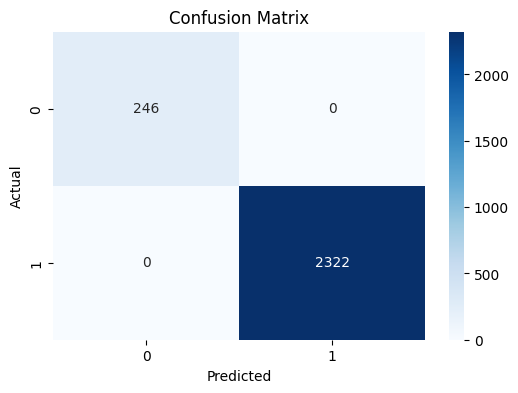

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       246\n           1       1.00      1.00      1.00      2322\n\n    accuracy                           1.00      2568\n   macro avg       1.00      1.00      1.00      2568\nweighted avg       1.00      1.00      1.00      2568\n'

In [ ]:
# Encode 'Current/Intended Major' column
data['Current/Intended Major'] = le.fit_transform(data['Current/Intended Major'].astype(str))

# Split dataset into train and test sets again
X = data.drop(columns=['Churn'])
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model again
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = rf_model.predict(X_test)

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
report


<ipython-input-7-856bd5e36423>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


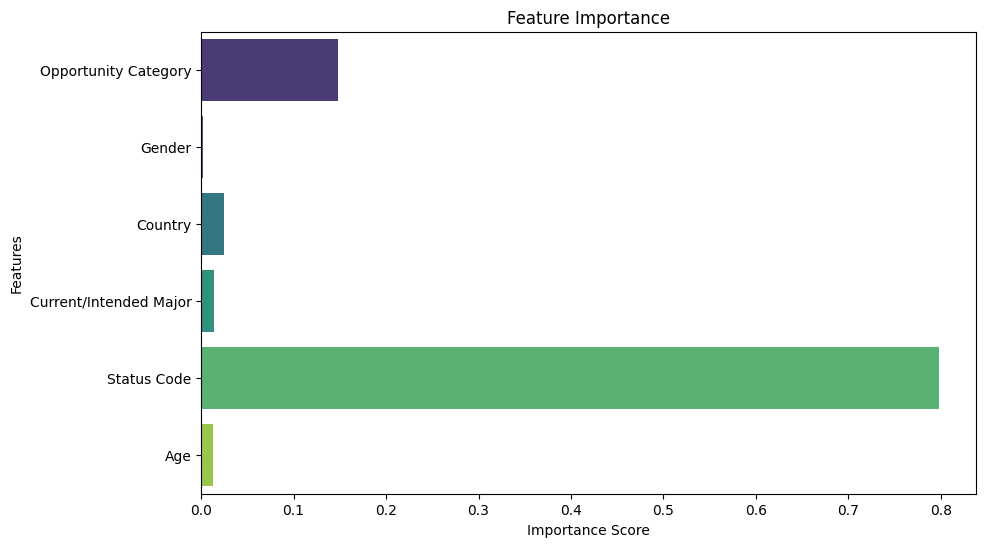

<ipython-input-7-856bd5e36423>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='muted')


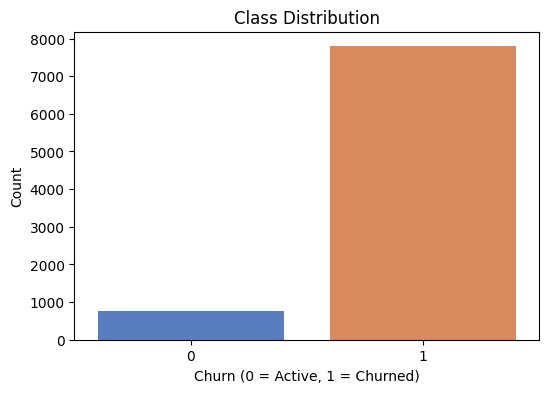

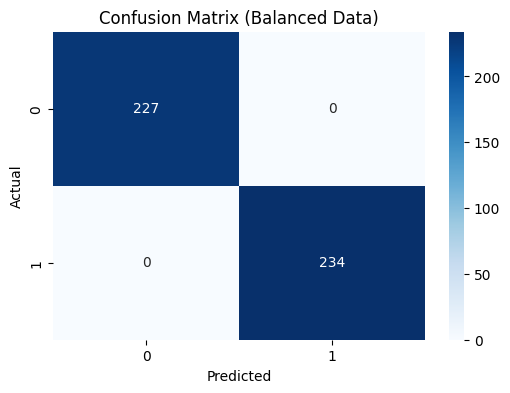

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       227\n           1       1.00      1.00      1.00       234\n\n    accuracy                           1.00       461\n   macro avg       1.00      1.00      1.00       461\nweighted avg       1.00      1.00      1.00       461\n'

In [ ]:
# Feature Importance Visualization
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Check Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data, palette='muted')
plt.title('Class Distribution')
plt.xlabel('Churn (0 = Active, 1 = Churned)')
plt.ylabel('Count')
plt.show()

# Balance the Dataset using Random Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Retrain the Model on Balanced Dataset
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
rf_model.fit(X_train_res, y_train_res)
y_pred_res = rf_model.predict(X_test_res)

# Confusion Matrix on Balanced Data
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_res, y_pred_res), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Balanced Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report on Balanced Data
report_resampled = classification_report(y_test_res, y_pred_res)
report_resampled


In [ ]:
# Manual Undersampling to Balance Dataset
churned = data[data['Churn'] == 1]
active = data[data['Churn'] == 0].sample(n=len(churned), random_state=42)

# Combine the undersampled dataset
df_balanced = pd.concat([churned, active])

# Split dataset into features and target
X_balanced = df_balanced.drop(columns=['Churn'])
y_balanced = df_balanced['Churn']

# Split into train and test sets
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Retrain the model
rf_model.fit(X_train_bal, y_train_bal)
y_pred_bal = rf_model.predict(X_test_bal)

# Confusion Matrix for Balanced Data
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bal, y_pred_bal), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Balanced Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for Balanced Data
report_balanced = classification_report(y_test_bal, y_pred_bal)
report_balanced


ValueError: Cannot take a larger sample than population when 'replace=False'

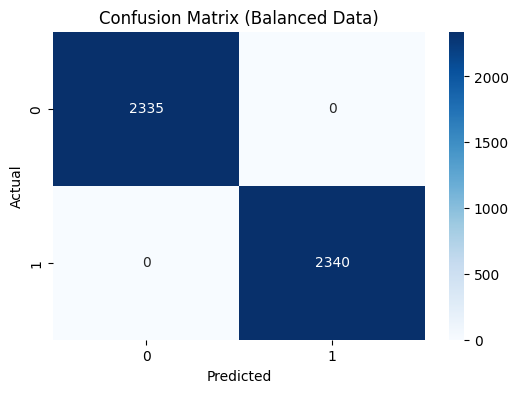

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      2335\n           1       1.00      1.00      1.00      2340\n\n    accuracy                           1.00      4675\n   macro avg       1.00      1.00      1.00      4675\nweighted avg       1.00      1.00      1.00      4675\n'

In [ ]:
# Manual Oversampling to Balance Dataset
active_oversampled = active.sample(n=len(churned), replace=True, random_state=42)

# Combine the oversampled dataset
df_balanced = pd.concat([churned, active_oversampled])

# Split dataset into features and target
X_balanced = df_balanced.drop(columns=['Churn'])
y_balanced = df_balanced['Churn']

# Split into train and test sets
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Retrain the model
rf_model.fit(X_train_bal, y_train_bal)
y_pred_bal = rf_model.predict(X_test_bal)

# Confusion Matrix for Balanced Data
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_bal, y_pred_bal), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Balanced Data)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report for Balanced Data
report_balanced = classification_report(y_test_bal, y_pred_bal)
report_balanced
